In [5]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
#import brian2genn

In [2]:
#set_device('genn')

In [8]:
spikes=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/spk_arr2.npy')
cell_identity=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/cell_identity2.npy')

In [13]:
print(spikes*1000)

[4.000000e+00 6.000000e+00 8.000000e+00 ... 3.128125e+06 3.128129e+06
 3.128129e+06]


In [20]:
start=time.time()
simulation_clock=Clock(dt = 0.1*ms)
defaultclock.dt = 0.1*ms
tau = 10*ms
vr = -70*mV
vt = -60*mV
eqs = '''
dv/dt = I_ampa/Cm : volt
I_ampa=-g_ext_ampa*s_ext*(v-E_ampa) : amp
ds_ext/dt=-s_ext/t_ampa : 1
'''
t_ampa=2*ms
Cm= 0.5*nF
E_ampa=0.0*mV
g_ext_ampa=3.1*nS
neuron = NeuronGroup(100, eqs, threshold='v>vt', reset='v=vr')
neuron.v = E_ampa
neuron.s_ext = 0
spikes_gen=SpikeGeneratorGroup(1000,list(cell_identity),spikes*1000*ms)
w = 1
S = Synapses(spikes_gen, neuron, on_pre='s_ext += w')
S.connect(p=0.1)
# Record the spikes
Mgp = SpikeMonitor(neuron)
Minput = SpikeMonitor(spikes_gen)
I_ampa_lst=[]
@network_operation(simulation_clock,when='start')
def update_nmda(simulation_clock):
    I_ampa=np.sum(neuron.I_ampa[:])
    I_ampa_lst.append(I_ampa)
duration=1000*ms
run(duration)
end=time.time()
print(end-start)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


73.56015348434448


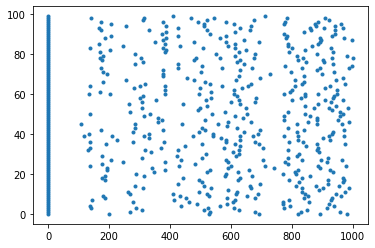

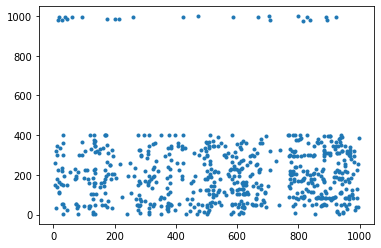

In [21]:
plot(Mgp.t/ms, Mgp.i, '.')
plt.show()
plot(Minput.t/ms,Minput.i,'.')

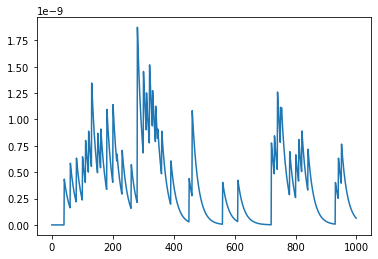

In [19]:
plt.plot(I_ampa_lst)

In [ ]:
print(cell_identity)